# Lab 9 - Clustering
---
**Summer 2025 - Intructor: Joyce Yang**

**Adapted from teaching materials by Prof. Chris Volinksy Fall 2024**

In this notebook we will be learning about similarities and clustering.

This notebook may contains optional task. If you have time, have fun working on optional task. You won't be penalize if you didn't finish optional task.

**Before we begin, remember to save this notebook IN YOUR OWN GOOGLE DRIVE**.  That way you have your own copy to work on, edit and share.

## K-Nearest Neighborhood (KNN)

Please note that KNN is **supervised learning** model which relies on similarities and clusters. We will use Universal Bank example.

Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal is to use k-NN to predict whether a new customer will accept a loan offer. This will serve as the basis for the design of a new campaign.

The UniversalBank.csv dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Download the Dataset from [here](https://drive.google.com/file/d/1oEMhYRVwuJIGIVKlfrNHYqLg4BuH5jxe/view?usp=drive_link)


### Load Data

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
from google.colab import files
uploaded = files.upload()

Saving UniversalBank.csv to UniversalBank.csv


In [3]:
ubank = pd.read_csv('UniversalBank.csv')
ubank.columns = ubank.columns.str.replace(' ','_')
print(ubank.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


### Process Data

#### Task 1
Our target is `Personal Loan`. Process the data to prepare for modelling
Hint:
1. Categorical data dummies
2. Remove Identifier and `ZipCode`.
3. Split data into X and y
4. Partitiion data into 80/20 training testing
5. Use `StandardScalar` to normalize dataset


In [4]:
ubank = ubank.drop(columns=[col for col in ['ID', 'ZIP_Code'] if col in ubank.columns])
ubank = pd.get_dummies(ubank, drop_first=True)
X = ubank.drop('Personal_Loan', axis=1)
y = ubank['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(ubank)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0    

### Fit the KNN model

#### Task 2

Fit the KNN model with `KNeighborsClassifier`. Remember that one of the hyper-parameter is number of numbers. Please navigate around the proper range and find the optimal value for neighborhood. Evaluate with precision, recall and f1score. *You don't have to do validation. Evaluate on testing should be enough*.

In [ ]:

precision_scores = []
recall_scores = []
f1_scores = []
k_range = range(1, 15)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
print(precision_scores)
print(recall_scores)
print(f1_scores)

[0.8823529411764706, 0.953125, 0.9230769230769231, 0.9552238805970149, 0.935064935064935, 0.9393939393939394, 0.9166666666666666, 0.9180327868852459, 0.9014084507042254, 0.9076923076923077, 0.9117647058823529, 0.9285714285714286, 0.90625, 0.9272727272727272, 0.9016393442622951, 0.9259259259259259, 0.9166666666666666, 0.9215686274509803, 0.9074074074074074, 0.9038461538461539]
[0.7142857142857143, 0.580952380952381, 0.6857142857142857, 0.6095238095238096, 0.6857142857142857, 0.5904761904761905, 0.6285714285714286, 0.5333333333333333, 0.6095238095238096, 0.5619047619047619, 0.5904761904761905, 0.49523809523809526, 0.5523809523809524, 0.4857142857142857, 0.5238095238095238, 0.47619047619047616, 0.5238095238095238, 0.44761904761904764, 0.4666666666666667, 0.44761904761904764]
[0.7894736842105263, 0.7218934911242604, 0.7868852459016393, 0.7441860465116279, 0.7912087912087912, 0.7251461988304093, 0.7457627118644068, 0.6746987951807228, 0.7272727272727273, 0.6941176470588235, 0.71676300578034

#### Task 3
Which k value will you choose? Based on which criteria? Why do you decide to use this criteria?

In [6]:
#k=2 because of the accuracy score was at its highest point and the otyher score were their higher end as well

## K-Mean Clusters

In this section we will create some synthetic data sets to see how k-means works in different scenarios.

In [7]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

### First Example


First, we'll create data using a function that generates [gaussian blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). We create 3 blobs.

In [8]:
n_samples = 1000
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1,random_state=random_state)

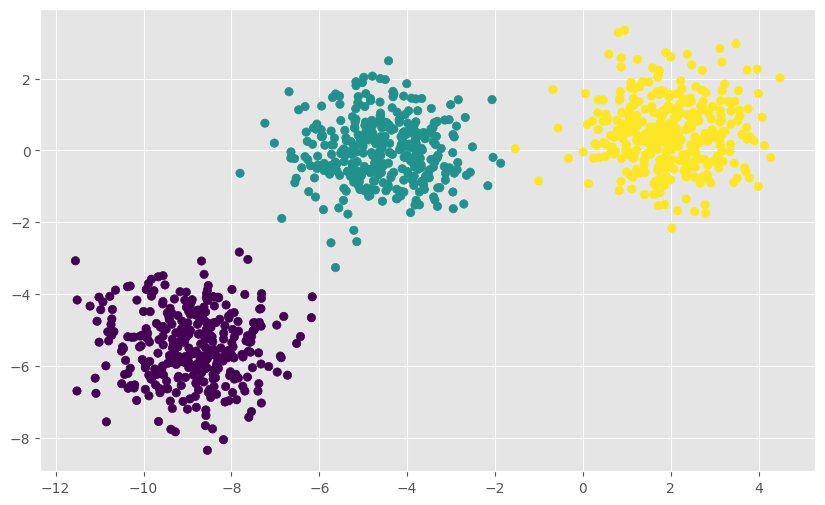

In [9]:
# plot data
plt.scatter(X[:, 0], X[:, 1], c=y, marker="o");

If k-means is any good it should get this right!!!  

I will also assume I know a-priori that there are 3 clusters.

Now we run the scikit-learn KMeans implementation with function parameters
* `n_clusters`: $k=3$ clusters
* `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of the total intra-cluster distance. Defaults to 10.
* `init`: = "k++" this does a "smart" initial placement of the clusters.
* `max_iter`: only one iteration



The clusters are plotted using color.

#### Task 4

Use `KMeans` with `n_clusters = 3`,`n_init=3`,`init="random"`, `max_iter=1` to fit with X.

Plot (scatter plot) to see if your model correctly classified.

Hint: set `c=y_pred`.

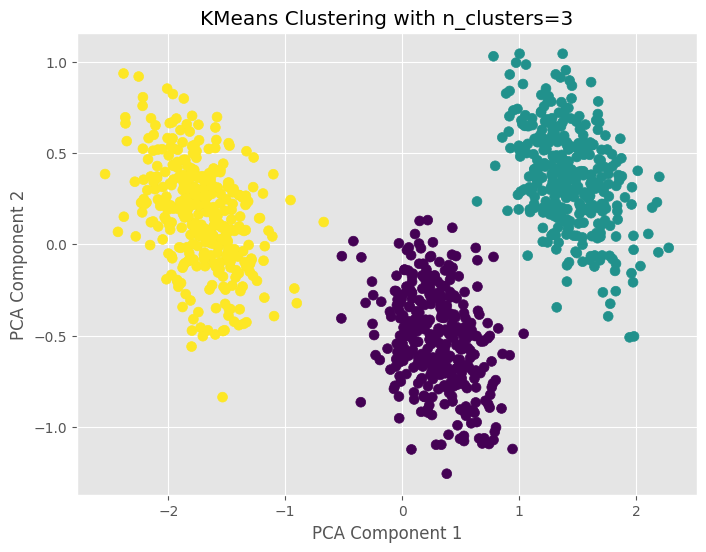

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, n_init=3, init="random", max_iter=1, random_state=42)
kmeans.fit(X_scaled)
y_pred = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('KMeans Clustering with n_clusters=3')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

You can also try with different std. deviation of the clusters and see the impact.

play around with blob numbers, cluster numbers, etc...

### More Complicated Example

Lets see how k-means dies for blobs that are spread out and have different densities:

#### Varying Density and Size

Lets see how k-means dies for blobs that are spread out and have different densities:
unevenly spread out

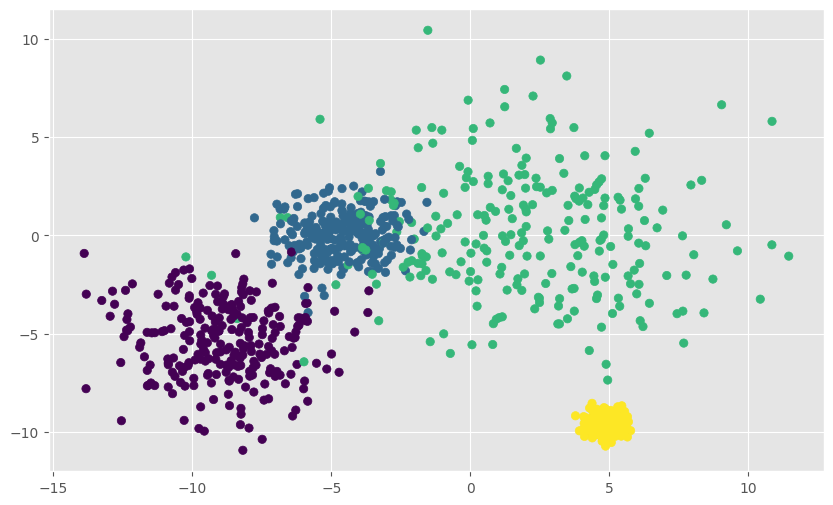

In [11]:
X, y = make_blobs(n_samples=n_samples, centers=4, cluster_std=[1.9, 1.2, 3.5, 0.4], random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], c=y, marker="o")

##### Task 5

Use `KMeans` with `n_clusters = 4` to fit with X. See how well you can split them into clusters

Plot (scatter plot) to see if your model correctly classified.

Comment on whether it learns well or not.

#### Non-blob point clouds

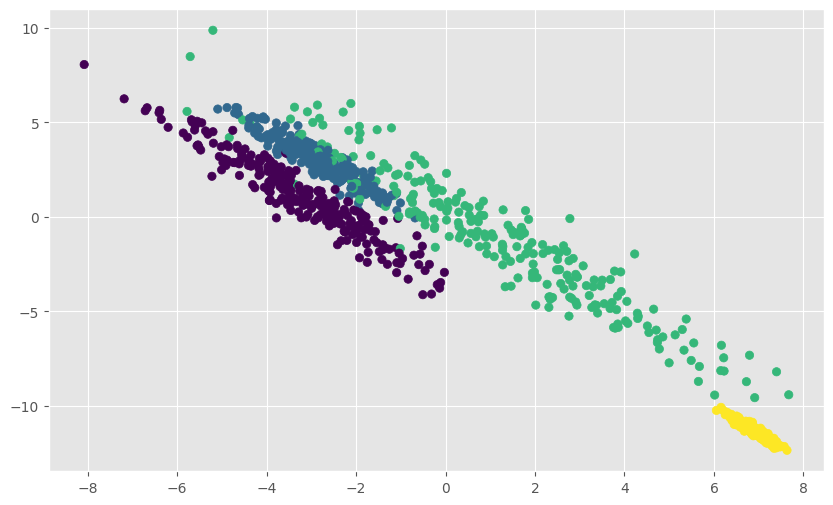

In [12]:
# Non-blob distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1],c=y,  marker="o")

##### Task 6

Use `KMeans` to fit with X. See how well you can split them into clusters. You should be able to specify the number of clusters.

Plot (scatter plot) to see if your model correctly classified.

Comment on whether it learns well or not.

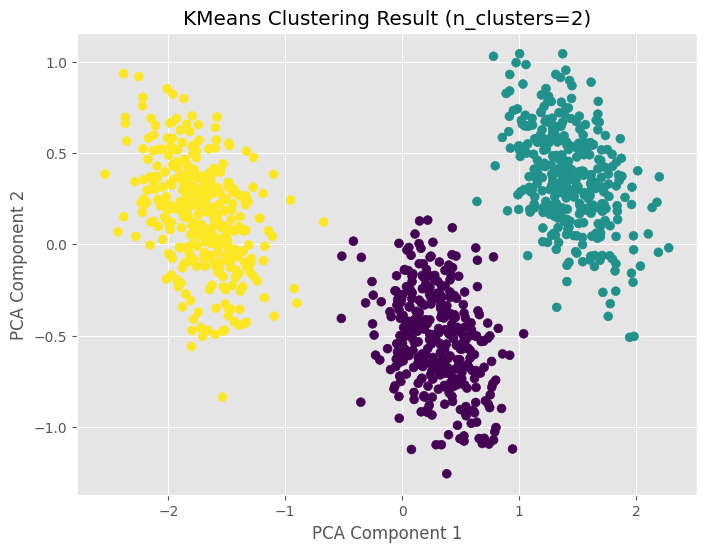

Adjusted Rand Index (ARI): 0.532
Normalized Mutual Information (NMI): 0.628


In [14]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the predicted clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=40)
plt.title("KMeans Clustering Result (n_clusters=2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

ari = adjusted_rand_score(y, y_pred)
nmi = normalized_mutual_info_score(y, y_pred)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

### Choosing k in k-means

$k$-means is very sensitive to the choice of the parameter, $k$

In previous examples, we know the ground truth, so we can pick the $k$ value easily. But in real world, we won't be able to know what's the optimal $k$ value. Therefore, we need to find the optimal $k$ value.


**How do you choose K?** Ideas:

1. Visual comparison.
2. Looking for at which $k$ the total intra-cluster distance tapers off.
3. [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are lower dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

#### Analyzing Change in Intra-Cluster Distance

We can run K-Means for different Ks and plot the intra-cluster distance.

In [15]:
X, y = make_blobs(n_samples=n_samples, centers=5, cluster_std=1.0, random_state=random_state)

##### Task 7

Again, try k value from 1 to 10.
Use `model.score` to get the intra-cluster distance estimation.

Plot the score v.s. k.

What's the optimal value for k? Is it the same as the groud truth?

You can also try with increasing cluster_std.

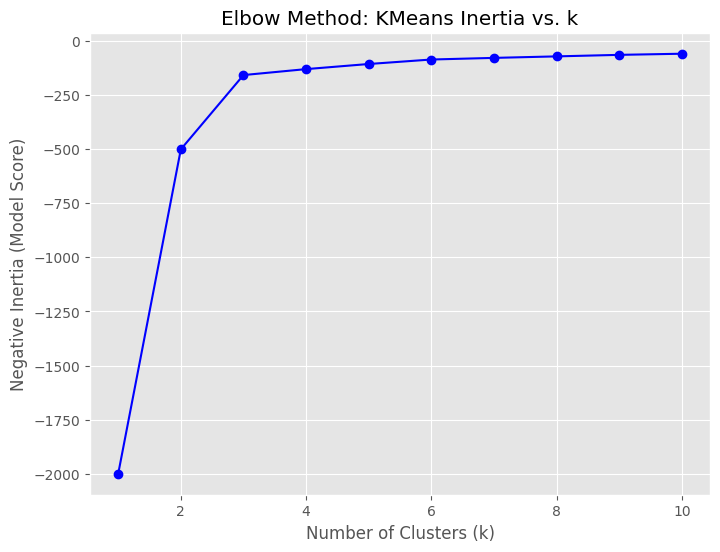

In [16]:

scores = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    scores.append(kmeans.score(X_scaled))

plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Negative Inertia (Model Score)')
plt.title('Elbow Method: KMeans Inertia vs. k')
plt.grid(True)
plt.show()

## Hierarchical Clustering

### Task 8
Read through and understand the Hierarchical Clustering section.

Notebook without output of the following code will be considered incomplete.

We have a record of 22 public utilities in Unite States. *We are interested in forming groups of similar utilities*.

The records to be clustered are the utilities, and the clustering will be based on the eight measurements on each utility. An example where clustering would be useful is a study to predict the cost impact of deregulation. To do the requisite analysis, economists would need to build a detailed cost model of the various utilities. It would save a considerable amount of time and effort if we could cluster similar types of utilities and build detailed cost models for just one "typical" utility in each cluster and then scale up from these models to estimate results for all utilities.

Fixed = fixed-charge covering ratio (income/debt); RoR = rate of return on capital

Cost = cost per kilowatt capacity in place; Load = annual load factor

Demand = peak kilowatthour demand growth from 1974 to 1975

Sales = sales (kilowatthour use per year)

Nuclear = percent nuclear

Fuel Cost = total fuel costs (cents per kilowatthour)

[Click here for the data.](https://drive.google.com/uc?download&id=1KLTyzD0q9c76jEPRPe9epXPc0Oi3Uo74)

### Load Data

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Utilities.csv to Utilities.csv


In [19]:
utilities_df = pd.read_csv('Utilities.csv')
# set row names to the utilities column
utilities_df.set_index('Company', inplace=True)
# while not required, the conversion of integer data to float
# will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

In order for similarities to treat each feature "equally" we need to normalize the data.  

Here we create normalized z-scores for each value by subtracting the mean and dividing by SD.

Then we calculate the distances between each utility.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(utilities_df)
scaled_data = scaler.transform(utilities_df)

# create a data frame
utilities_df_norm = pd.DataFrame(scaled_data, columns=utilities_df.columns, index=utilities_df.index)


In [22]:
d_norm = pairwise.pairwise_distances(utilities_df_norm, metric='euclidean')
util_distmat = pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index)#
util_distmat.round(2)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.00,3.17,3.77,2.52,4.22,3.69,3.99,2.80,3.33,3.17,...,4.05,2.16,2.65,4.13,4.50,1.92,2.47,3.25,3.53,2.57
Boston,3.17,0.00,5.03,2.22,3.94,4.32,3.53,3.98,4.05,2.77,...,3.52,4.43,2.56,4.95,3.71,2.97,4.74,3.07,2.37,2.48
Central,3.77,5.03,0.00,4.20,4.57,3.06,4.32,5.11,2.82,4.03,...,4.49,2.81,5.28,5.39,6.51,2.79,3.25,3.82,5.21,4.21
Commonwealth,2.52,2.22,4.20,0.00,4.22,3.28,4.06,3.78,3.84,1.53,...,2.64,3.31,3.27,5.08,5.01,2.71,3.55,1.86,3.98,2.64
NY,4.22,3.94,4.57,4.22,0.00,4.71,4.70,5.28,4.60,4.14,...,4.87,4.93,4.36,5.95,5.76,4.44,5.25,4.49,3.73,3.86
Florida,3.69,4.32,3.06,3.28,4.71,0.00,3.43,5.03,3.82,3.92,...,4.66,3.55,4.16,5.98,6.24,2.92,2.64,2.98,4.74,4.12
Hawaiian,3.99,3.53,4.32,4.06,4.70,3.43,0.00,4.47,2.86,4.61,...,5.13,5.03,3.00,5.16,4.69,3.02,4.62,3.63,2.74,4.09
Idaho,2.80,3.98,5.11,3.78,5.28,5.03,4.47,0.00,3.68,3.76,...,4.24,4.44,3.94,2.25,5.55,3.31,4.20,4.19,4.07,3.32
Kentucky,3.33,4.05,2.82,3.84,4.60,3.82,2.86,3.68,0.00,3.66,...,3.74,3.91,4.21,3.71,5.02,2.49,4.21,3.02,3.83,3.28


Lets find the most similar Utilities to a specific one - let's say Texas

In [23]:
util='Texas'
distances_util = util_distmat.loc[util].drop(util) # want minimum distance, not including itself!

# Find the indices of the smallest distances - these are the most similar entities to C
# You might want to retrieve the top N similar; for example, top 3

top_similar_indices = distances_util.nsmallest(3).index.tolist()
top_similar_indices

['Oklahoma', 'Arizona ', 'Southern']

### Create Hierarchical Clustering

In [ ]:
# code for hierarchical clustering
plt.figure(figsize=(8, 6))
# in linkage() set argument method = 'average', 'complete', 'average', 'weighted', centroid', 'median', 'ward'
Z = linkage(utilities_df_norm, method='complete')
ddd = dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)

### Creating clusters by Cutting the Dendrogram

In [24]:
memb = fcluster(linkage(utilities_df_norm, method='complete'), 7, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
     print(key, ': ', ', '.join(item.index))

1 :  Central , Kentucky
2 :  Arizona , Florida , Oklahoma, Southern, Texas
3 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
4 :  NY
5 :  Idaho, Nevada, Puget
6 :  Hawaiian , New England, Pacific , United
7 :  San Diego
